In [2]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from math import sqrt
from numpy.linalg import eigh,eig
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
def zscore(m):
    return ((m.T-np.mean(m,axis=1))/np.std(m,axis=1)).T

def cov(matrix):
  return np.dot(matrix.T,matrix)/shape[0] 
    
def pca(matrix,shape): 
    values,vectors=eigh(matrix)
    vectors=np.asarray(vectors).T
    res = {values[i]: vectors[i] for i in range(len(values))}
    od=OrderedDict(sorted(res.items(),reverse=True))
    return od

def svd(matrix):
  mat1 = np.dot(matrix,matrix.T)
  values,vectors=eigh(mat1)
  vectors=np.asarray(vectors).T
  index=np.argsort(values)[::-1]
  U_sorted=np.asarray([vectors[i] for i in index])

  mat2 = np.dot(matrix.T,matrix)
  values,vectors=eigh(mat2)
  vectors=np.asarray(vectors).T
  index=np.argsort(values)[::-1]
  V_sorted=np.asarray([vectors[i] for i in index])

  sigma=[]
  for i in index:
    if(values[i]>0):
      sigma.append(sqrt(values[i]))
  
  return U_sorted,np.asarray(sigma),V_sorted

def show_img(vector):
  img_data = vector.reshape((64,64))
  plt.imshow(img_data,cmap='gray')
  plt.show()

def find_alphas(data,base_faces):
  matrix=np.empty((len(data),len(base_faces)))
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      matrix[i,j]=np.dot(data[i].T,base_faces[j])
  return matrix

def reconstruction(alphas,base_faces):
  
  for i in range(len(base_faces)):
    if(i==0):
      temp=base_faces[i]*alphas[i]
    else:
      temp+=base_faces[i]*alphas[i] 
  
  show_img(temp)

In [22]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data=data.reshape(shape[0],shape[1]*shape[2])

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
matrix=cov(data)

base_faces_dict = pca(matrix,shape)

########## Using Library ###########

pca = PCA(n_components = 16)
temp=pca.fit(matrix)
base_faces_pca=pca.components_
print(pca.explained_variance_ratio_)

(400, 64, 64)
[9.1814286e-01 4.7983710e-02 1.1697339e-02 5.2762805e-03 4.2795627e-03
 2.5022747e-03 1.6833756e-03 1.5534887e-03 9.7549224e-04 7.4393576e-04
 6.9070770e-04 5.3808227e-04 4.3891161e-04 3.8042502e-04 3.3163282e-04
 2.7004007e-04]


(400, 4096)
(400, 16)


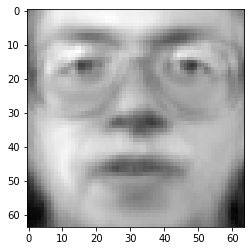

In [23]:
base_faces=[base_faces_dict[i] for i in base_faces_dict]
print(data.shape)
alphas = find_alphas(data,base_faces[:16])
print(alphas.shape)
number = int(input("Enter face number"))
reconstruction(alphas[number],base_faces[:16])

(400, 64, 64)
[[-0.05747622]
 [-0.04920359]
 [-0.0490276 ]
 [-0.04135836]
 [-0.03167444]
 [-0.02830805]
 [-0.02476616]
 [-0.0201473 ]
 [-0.01468817]
 [-0.02845859]
 [-0.08583173]
 [-0.18095022]
 [-0.23089653]
 [-0.14323191]
 [-0.12893291]
 [-0.32618046]
 [-0.39280498]
 [-0.28515646]
 [-0.1148475 ]
 [-0.04883662]
 [-0.06858918]
 [-0.02107462]
 [ 0.03954242]
 [ 0.04648754]
 [ 0.0405027 ]
 [ 0.03683531]
 [ 0.03299681]
 [ 0.01878302]
 [ 0.00137341]
 [ 0.00301206]
 [ 0.00171023]
 [-0.00517647]
 [-0.01756488]
 [-0.01416185]
 [ 0.00310175]
 [ 0.00901799]
 [ 0.01367609]
 [ 0.01295744]
 [ 0.01343803]
 [ 0.02099749]
 [ 0.06146094]
 [ 0.11927836]
 [ 0.12113842]
 [ 0.12888652]
 [ 0.1362138 ]
 [ 0.12653154]
 [ 0.10258339]
 [ 0.09755772]
 [ 0.09311122]
 [ 0.07258116]
 [ 0.05946016]
 [ 0.08971751]
 [ 0.15382382]
 [ 0.18449749]
 [ 0.10411445]
 [ 0.05627527]
 [ 0.01415073]
 [-0.05521858]
 [-0.1329818 ]
 [-0.19678743]
 [-0.2278317 ]
 [-0.23981333]
 [-0.24119738]
 [-0.23422676]]
[[-0.04450183 -0.06843402

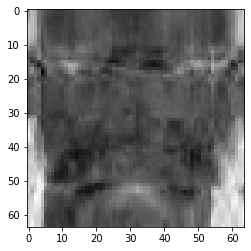

[[ 0.05747626]
 [ 0.04920361]
 [ 0.0490276 ]
 [ 0.04135836]
 [ 0.03167447]
 [ 0.02830804]
 [ 0.02476616]
 [ 0.02014731]
 [ 0.01468817]
 [ 0.02845858]
 [ 0.08583171]
 [ 0.18095021]
 [ 0.2308965 ]
 [ 0.14323188]
 [ 0.12893288]
 [ 0.3261804 ]
 [ 0.3928049 ]
 [ 0.28515643]
 [ 0.11484748]
 [ 0.04883662]
 [ 0.06858918]
 [ 0.02107461]
 [-0.03954242]
 [-0.04648753]
 [-0.0405027 ]
 [-0.03683531]
 [-0.03299681]
 [-0.01878302]
 [-0.00137341]
 [-0.00301206]
 [-0.00171023]
 [ 0.00517648]
 [ 0.01756489]
 [ 0.01416184]
 [-0.00310175]
 [-0.00901795]
 [-0.01367611]
 [-0.01295742]
 [-0.01343802]
 [-0.0209975 ]
 [-0.06146095]
 [-0.11927838]
 [-0.12113842]
 [-0.12888657]
 [-0.13621378]
 [-0.12653154]
 [-0.10258345]
 [-0.09755775]
 [-0.0931112 ]
 [-0.07258118]
 [-0.05946023]
 [-0.08971754]
 [-0.15382378]
 [-0.18449752]
 [-0.10411449]
 [-0.05627532]
 [-0.01415071]
 [ 0.05521863]
 [ 0.13298182]
 [ 0.19678745]
 [ 0.22783178]
 [ 0.23981334]
 [ 0.24119736]
 [ 0.23422684]]
[[-0.04450183 -0.06843406 -0.00204792  

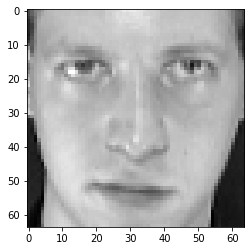

In [24]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
data=data.reshape(shape)

for i in data[2:3]:
    matrix = np.zeros(shape[1:])    
    U,sigma,V = svd(i)
    U = U.T
    print(np.matrix(U[:, 2:3]))
    print(np.matrix(V[2:3, :]))
    print(np.diag(sigma[:3]))
    
    for j in range(1):
        matrix=np.matrix(U) * np.diag(sigma) * np.matrix(V)
    show_img(matrix)

############# using library ##############

for i in data[2:3]:
    U,sigma,V = np.linalg.svd(i)
    print(np.matrix(U[:, 2:3]))
    print(np.matrix(V[2:3, :]))
    print(np.diag(sigma[:3]))
    for j in range(1):
        reconstimg = np.matrix(U[:, :64]) * np.diag(sigma[:64]) * np.matrix(V[:64, :])
    show_img(reconstimg)